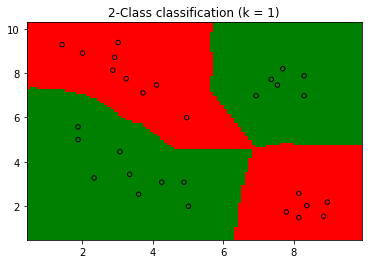

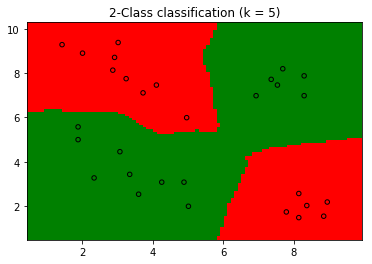

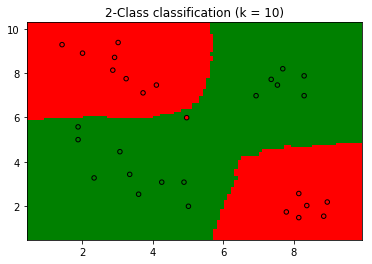

In [20]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from __future__ import division
import pylab
from sklearn.model_selection import KFold
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

### load data ###
def load_data():
    # load data from file
    data = np.array(np.genfromtxt('knn_data.csv', delimiter=','))
    X = data[:,0:-1]
    y = data[:,-1]
    
    return X,y

X,y = load_data()
h = .1  # step size in the mesh

# Create color maps
light = ListedColormap(['green', 'red'])
bold = ListedColormap(['green', 'red'])
a=[1,5,10]
for n_neighbors in a:
    # we create an instance of Neighbours Classifier and fit the data.
    k_nn= neighbors.KNeighborsClassifier(n_neighbors)
    k_nn.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = k_nn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=bold,edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)"
              % (n_neighbors))

    plt.show()